## Stock Prices of Mastercard and Visa (2008-2024)

The dataset includes the historical stock prices of Mastercard and Visa from 2008 to 2024, which can be used for various machine learning projects. Potential problem statements could involve forecasting future stock prices using time series analysis, exploring correlations between the stock prices of the two companies, or building predictive models to understand the factors influencing stock price fluctuations.

## Overview of Problem Statement:

  The goal is to predict the closing prices of Mastercard and Visa stocks using historical stock price data.

## Objective:

 Develop a predictive model using linear regression to forecast the closing prices of Mastercard and Visa stocks.

## Data Description:
  *   Source:  "Stock Prices of Mastercard and Visa (2008-2024)"-https://raw.githubusercontent.com/Rashida-kk/Stock-Prices-of-MasterCard-and-Visa-2008-2024-/main/MVR.csv
  
  *   Features:
    *   Date: The date of the recorded stock prices.
    *   High_M: Highest price of Mastercard stock for the day.
    *   Low_M: Lowest price of Mastercard stock for the day.
    *   Close_M: Closing price of Mastercard stock.
    *   Adj Close_M: Adjusted closing price of Mastercard stock.
    *   Volume_M: Trading volume of Mastercard stock.
    *   Open_V: Opening price of Visa stock.
    *   High_V: Highest price of Visa stock for the day.
    *   Low_V: Lowest price of Visa stock for the day.
    *   Close_V: Closing price of Visa stock.
    *   Adj Close_V: Adjusted closing price of Visa stock.
    *   Volume_V: Trading volume of Visa stock.


## Data Collection:
Import the dataset from Github and load it into a pandas DataFrame.

In [ ]:
!wget https://raw.githubusercontent.com/Rashida-kk/Stock-Prices-of-MasterCard-and-Visa-2008-2024-/main/MVR.csv

--2024-08-16 06:47:56--  https://raw.githubusercontent.com/Rashida-kk/Stock-Prices-of-MasterCard-and-Visa-2008-2024-/main/MVR.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 509935 (498K) [text/plain]
Saving to: ‘MVR.csv’

MVR.csv             100%[===================>] 497.98K  2.95MB/s    in 0.2s    

2024-08-16 06:47:57 (2.95 MB/s) - ‘MVR.csv’ saved [509935/509935]



In [ ]:
import pandas as pd

data = pd.read_csv("/content/MVR.csv")


In [ ]:
#printing first 5 rows of dataset
data.head()

,Date,Open_M,High_M,Low_M,Close_M,Adj Close_M,Volume_M,Open_V,High_V,Low_V,Close_V,Adj Close_V,Volume_V
0,2008-06-02,30.926001,32.000000,30.257000,32.000000,29.529486,50620000,21.552500,21.737499,21.150000,21.517500,19.202324,36856000
1,2008-06-03,31.386999,31.399000,30.235001,30.740000,28.366755,93913000,21.752501,21.987499,21.507500,21.889999,19.534735,48411600
2,2008-06-04,30.745001,30.959999,29.454000,29.740000,27.443956,66160000,21.770000,22.025000,21.320000,21.370001,19.070698,40684400
3,2008-06-05,29.951000,30.615999,29.544001,30.615999,28.252338,45959000,21.615000,21.809999,21.397499,21.809999,19.463354,27059600
4,2008-06-06,30.228001,30.242001,29.481001,29.573000,27.289856,29383000,21.475000,21.497499,20.887501,20.912500,18.662413,41748000


In [ ]:
print(data.shape)

In [ ]:
# Display a summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4047 entries, 0 to 4046
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4047 non-null   object 
 1   Open_M       4047 non-null   float64
 2   High_M       4047 non-null   float64
 3   Low_M        4047 non-null   float64
 4   Close_M      4047 non-null   float64
 5   Adj Close_M  4047 non-null   float64
 6   Volume_M     4047 non-null   int64  
 7   Open_V       4047 non-null   float64
 8   High_V       4047 non-null   float64
 9   Low_V        4047 non-null   float64
 10  Close_V      4047 non-null   float64
 11  Adj Close_V  4047 non-null   float64
 12  Volume_V     4047 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 411.1+ KB


In [ ]:
# statistical measure of the data
print(data.describe())

In [ ]:
# Display data types of all columns
print(data.dtypes)

Date            object
Open_M         float64
High_M         float64
Low_M          float64
Close_M        float64
Adj Close_M    float64
Volume_M         int64
Open_V         float64
High_V         float64
Low_V          float64
Close_V        float64
Adj Close_V    float64
Volume_V         int64
dtype: object


In [ ]:
# Attempt to convert all columns to numeric, forcing errors to NaN
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col])
    except ValueError:
        print(f"Column {col} cannot be converted to numeric.")

Column Date cannot be converted to numeric.


In [ ]:
# Print data types after conversion
print(data.dtypes)

Date            object
Open_M         float64
High_M         float64
Low_M          float64
Close_M        float64
Adj Close_M    float64
Volume_M         int64
Open_V         float64
High_V         float64
Low_V          float64
Close_V        float64
Adj Close_V    float64
Volume_V         int64
dtype: object


## Data Preprocessing - Data Cleaning:
     *   Handle missing values using appropriate imputation techniques.
     *   Address skewed data in numerical features through transformations.




In [ ]:
# Step 1: Handling Missing Data
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Date           0
Open_M         0
High_M         0
Low_M          0
Close_M        0
Adj Close_M    0
Volume_M       0
Open_V         0
High_V         0
Low_V          0
Close_V        0
Adj Close_V    0
Volume_V       0
dtype: int64


In [ ]:
# Impute missing values with forward fill
data.fillna(method='ffill', inplace=True)

<ipython-input-9-088fb792dff0>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
# Step 2: Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
# Step 3: Sort data by date
data.sort_values(by='Date', inplace=True)

In [ ]:
# Step 4: Remove duplicates
data.drop_duplicates(inplace=True)

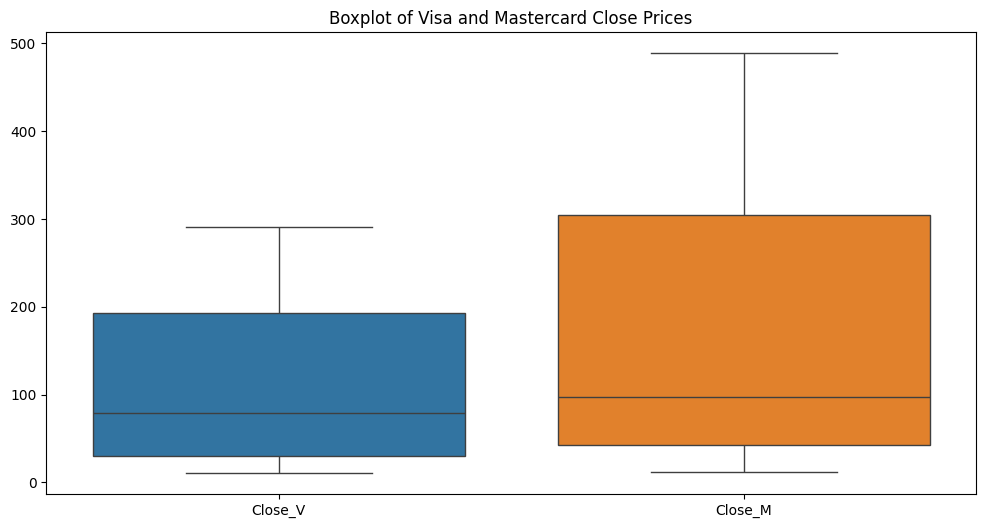

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers using a boxplot
# Combine box plots for Visa and Mastercard
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Close_V', 'Close_M']])
plt.title("Boxplot of Visa and Mastercard Close Prices")
plt.show()


In [ ]:
data.dropna(inplace=True)  # Remove missing values


If you detect outliers from the box plot, you may want to remove or cap them:

In [ ]:
# Calculate IQR for Visa
Q1_V = data['Close_V'].quantile(0.25)
Q3_V = data['Close_V'].quantile(0.75)
IQR_V = Q3_V - Q1_V

# Define bounds
lower_bound_V = Q1_V - 1.5 * IQR_V
upper_bound_V = Q3_V + 1.5 * IQR_V

# Cap outliers for Visa
data['Close_V'] = data['Close_V'].clip(lower_bound_V, upper_bound_V)

In [ ]:
# Calculate IQR for Mastercard
Q1_M = data['Close_M'].quantile(0.25)
Q3_M = data['Close_M'].quantile(0.75)
IQR_M = Q3_M - Q1_M

# Define bounds
lower_bound_M = Q1_M - 1.5 * IQR_M
upper_bound_M = Q3_M + 1.5 * IQR_M

# Cap outliers for Mastercard
data['Close_M'] = data['Close_M'].clip(lower_bound_M, upper_bound_M)

In [ ]:
# Handling skewed data:
# Logarithmic transformation
data['Close_V_log'] = np.log1p(data['Close_V'])
data['Close_M_log'] = np.log1p(data['Close_M'])

## Exploratory Data Analysis (EDA)
Gain insights through visualizations.

Histograms

 Histograms help us understand the distribution of data points for each feature.

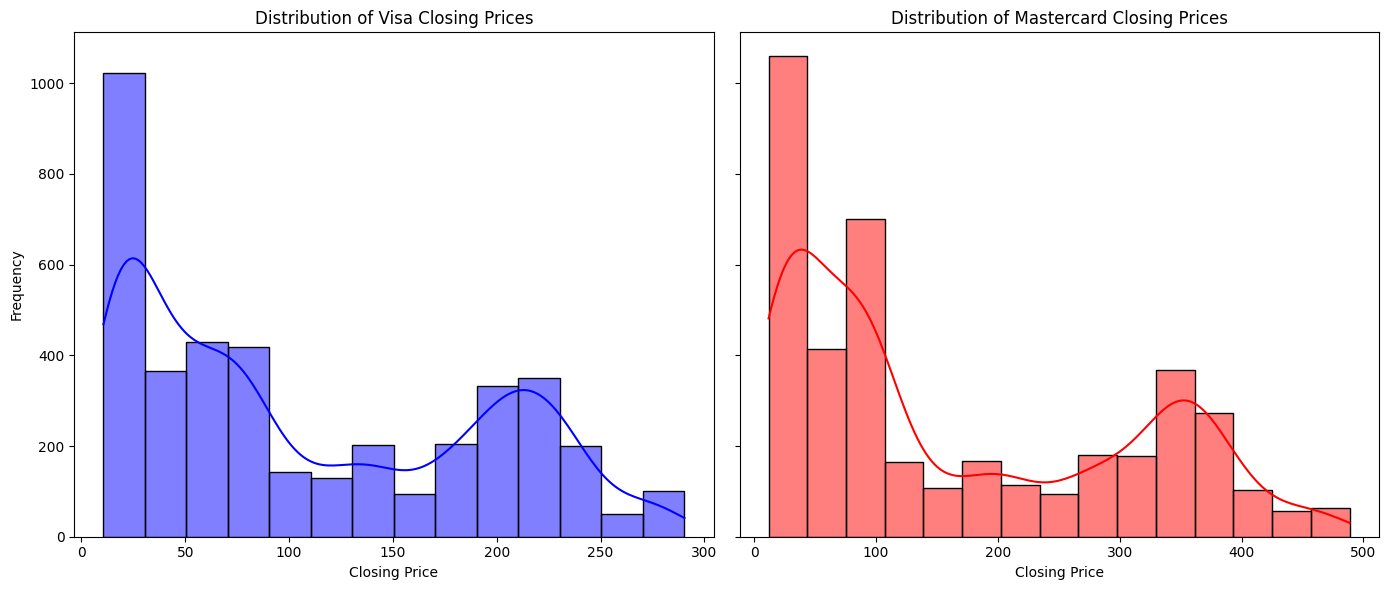

In [ ]:
# Plot combined histograms for Visa and Mastercard closing prices
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot Visa closing prices
sns.histplot(data['Close_V'], kde=True, color='blue', ax=axes[0], alpha=0.5)
axes[0].set_title('Distribution of Visa Closing Prices')
axes[0].set_xlabel('Closing Price')
axes[0].set_ylabel('Frequency')

# Plot Mastercard closing prices
sns.histplot(data['Close_M'], kde=True, color='red', ax=axes[1], alpha=0.5)
axes[1].set_title('Distribution of Mastercard Closing Prices')
axes[1].set_xlabel('Closing Price')
axes[1].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


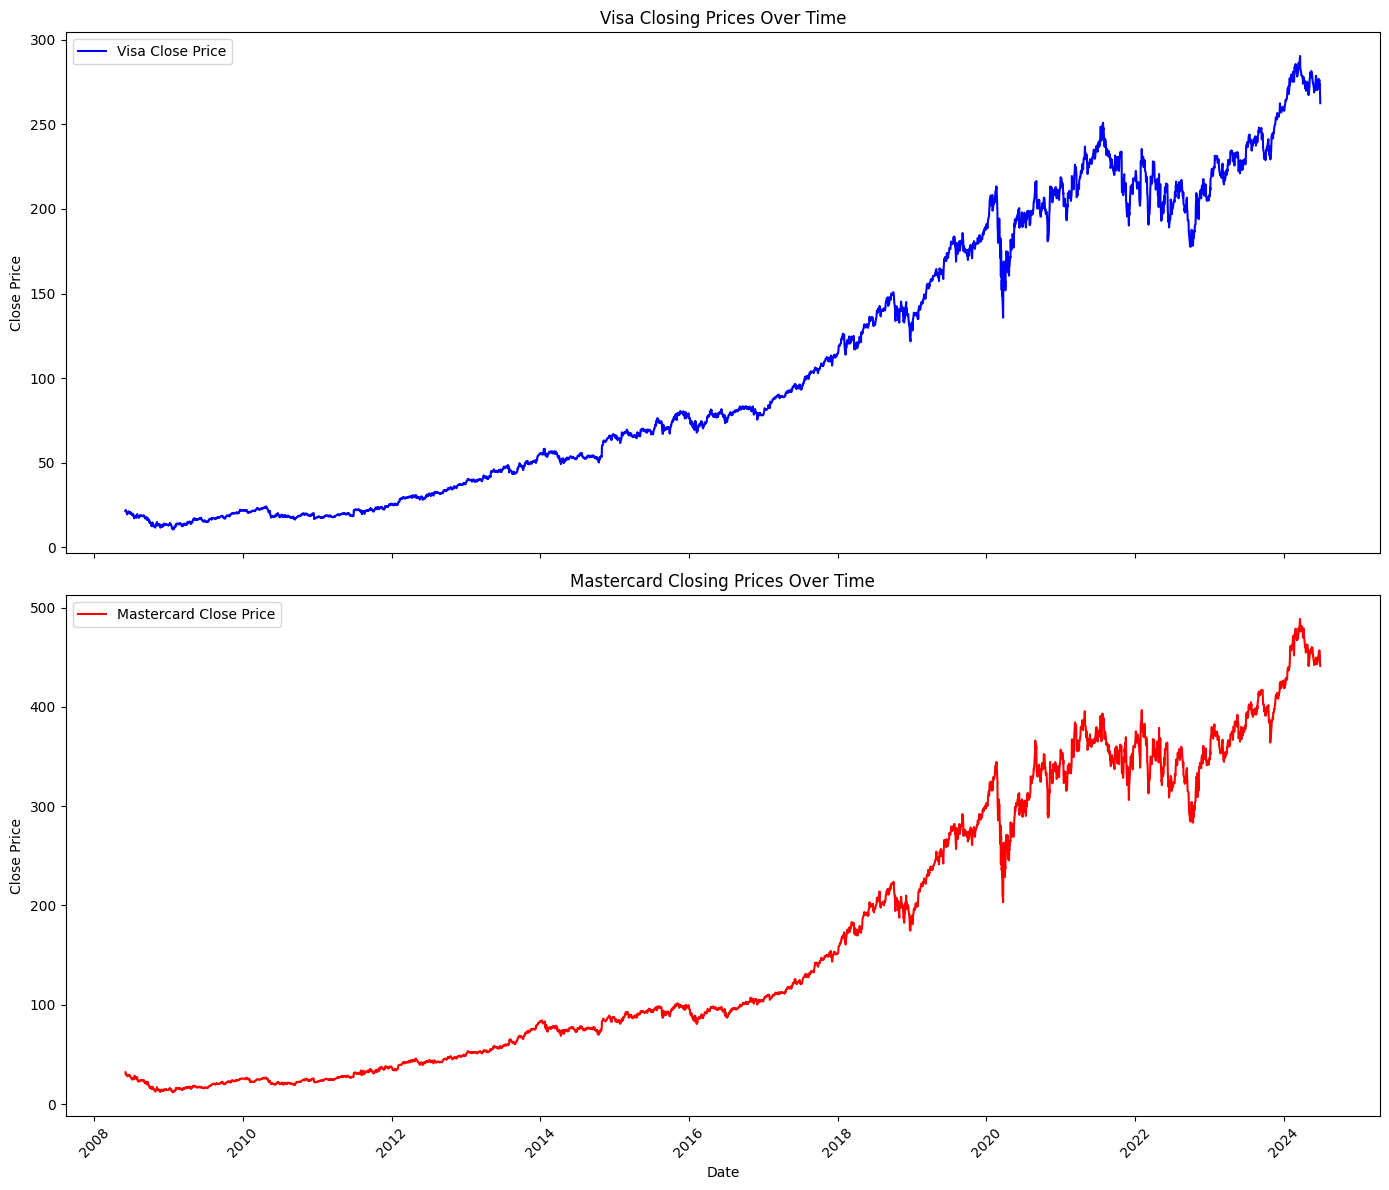

In [ ]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Plot Visa closing prices
axes[0].plot(data['Date'], data['Close_V'], label='Visa Close Price', color='blue')
axes[0].set_title('Visa Closing Prices Over Time')
axes[0].set_ylabel('Close Price')
axes[0].legend()

# Plot Mastercard closing prices
axes[1].plot(data['Date'], data['Close_M'], label='Mastercard Close Price', color='red')
axes[1].set_title('Mastercard Closing Prices Over Time')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Heatmap

A heatmap visualizes the correlation between different features in the dataset.

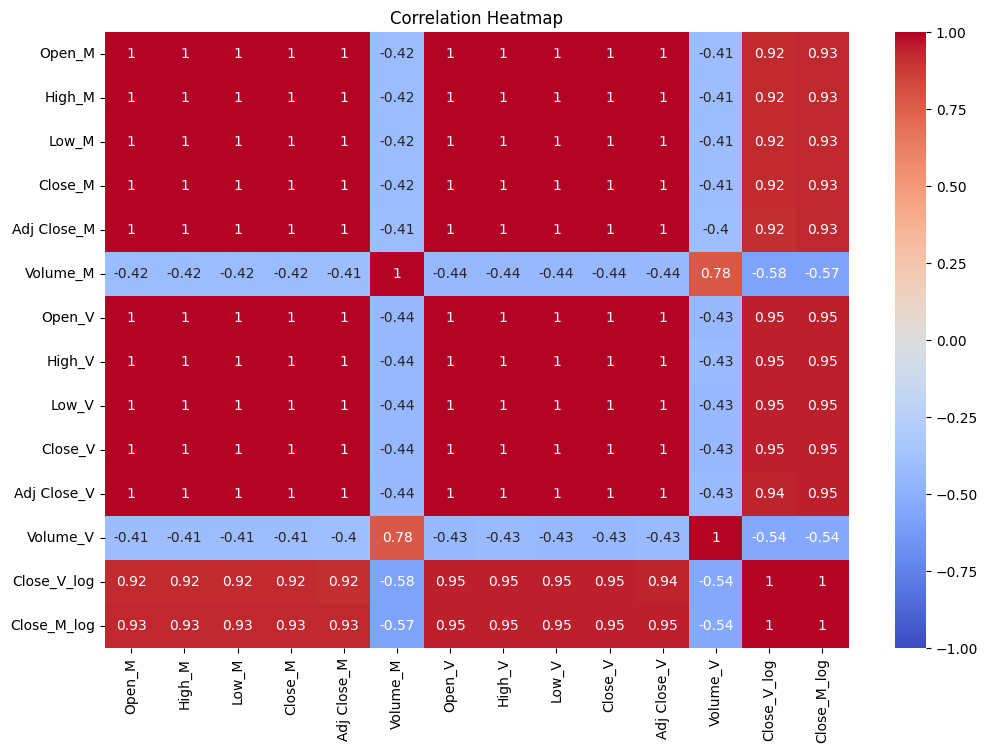

In [ ]:
# Drop rows with any NaN values
numeric_data = data.dropna()

# Select only numeric columns
numeric_data = numeric_data.select_dtypes(include=[float, int])

# Check if numeric data is present
if numeric_data.empty:
    print("No numeric data found")
else:
    # Compute the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()


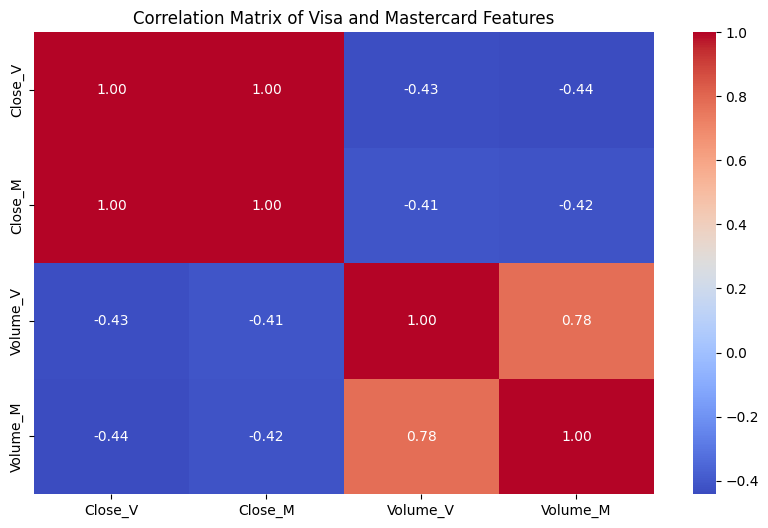

In [ ]:
# Calculate the correlation matrix
corr = data[['Close_V', 'Close_M', 'Volume_V', 'Volume_M']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Visa and Mastercard Features')
plt.show()

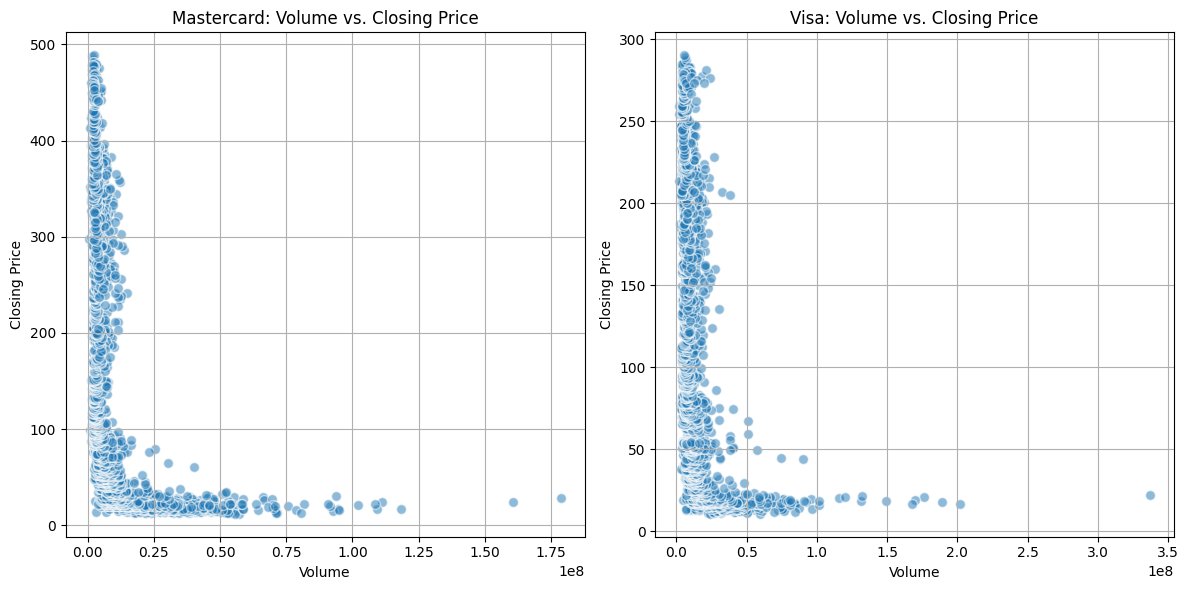

In [ ]:
# Scatter Plot: Volume vs. Closing Price for Mastercard
plt.figure(figsize=(12, 6))

# Mastercard
plt.subplot(1, 2, 1)
plt.scatter(data['Volume_M'], data['Close_M'], alpha=0.5, edgecolors='w', s=50)
plt.title('Mastercard: Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)

# Visa
plt.subplot(1, 2, 2)
plt.scatter(data['Volume_V'], data['Close_V'], alpha=0.5, edgecolors='w', s=50)
plt.title('Visa: Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Moving Avarage

# Set 'Date' as the index for plotting
data.set_index('Date', inplace=True)

# Calculate moving averages
data['MA50_M'] = data['Close_M'].rolling(window=50).mean()
data['MA200_M'] = data['Close_M'].rolling(window=200).mean()
data['MA50_V'] = data['Close_V'].rolling(window=50).mean()
data['MA200_V'] = data['Close_V'].rolling(window=200).mean()

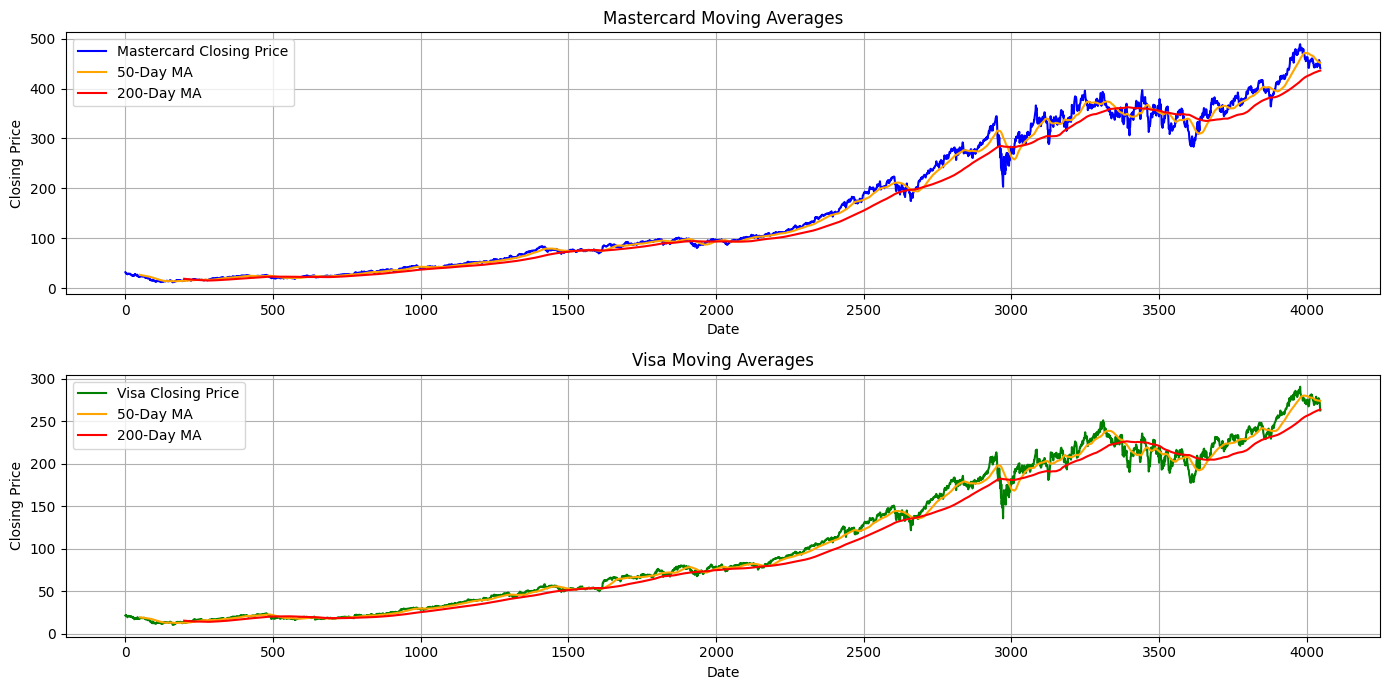

In [ ]:
# Calculate moving averages
data['MA50_M'] = data['Close_M'].rolling(window=50).mean()
data['MA200_M'] = data['Close_M'].rolling(window=200).mean()
data['MA50_V'] = data['Close_V'].rolling(window=50).mean()
data['MA200_V'] = data['Close_V'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(14, 7))

# Plot for Mastercard
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Close_M'], label='Mastercard Closing Price', color='blue')
plt.plot(data.index, data['MA50_M'], label='50-Day MA', color='orange')
plt.plot(data.index, data['MA200_M'], label='200-Day MA', color='red')
plt.title('Mastercard Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

# Plot for Visa
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Close_V'], label='Visa Closing Price', color='green')
plt.plot(data.index, data['MA50_V'], label='50-Day MA', color='orange')
plt.plot(data.index, data['MA200_V'], label='200-Day MA', color='red')
plt.title('Visa Moving Averages')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

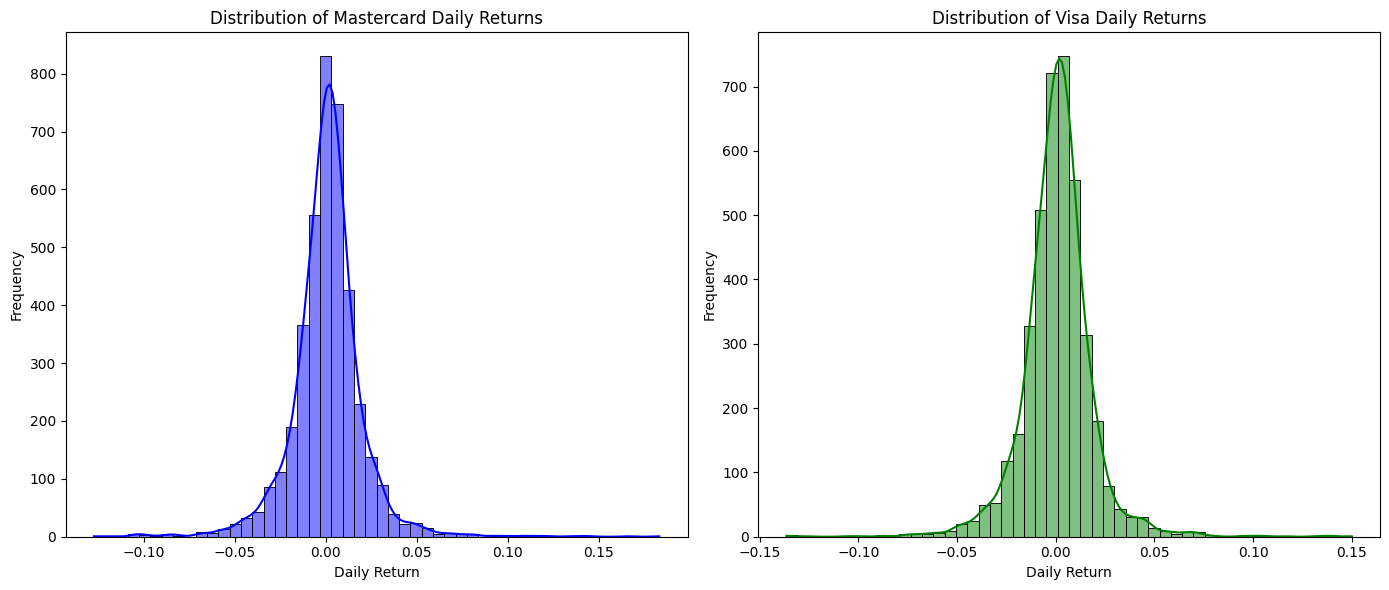

In [ ]:
# Daily returns:

# Calculate daily returns
data['Daily Return_M'] = data['Close_M'].pct_change()
data['Daily Return_V'] = data['Close_V'].pct_change()

# Plot Daily Returns
plt.figure(figsize=(14, 6))

# Daily Returns for Mastercard
plt.subplot(1, 2, 1)
sns.histplot(data['Daily Return_M'].dropna(), bins=50, kde=True, color='blue')
plt.title('Distribution of Mastercard Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

# Daily Returns for Visa
plt.subplot(1, 2, 2)
sns.histplot(data['Daily Return_V'].dropna(), bins=50, kde=True, color='green')
plt.title('Distribution of Visa Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

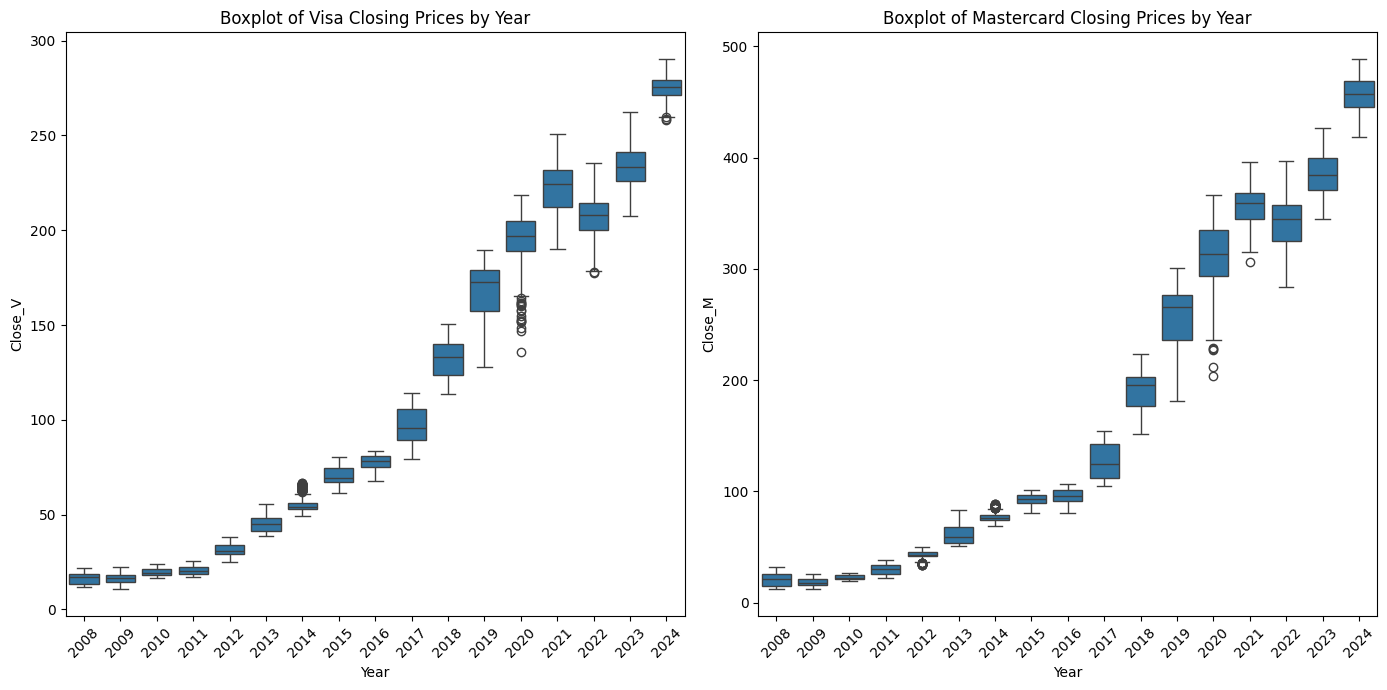

In [ ]:
# Extract the year from the Date column
data['Year'] = data['Date'].dt.year

# Plotting the boxplots
plt.figure(figsize=(14, 7))

# Boxplot for Visa Closing Prices by Year
plt.subplot(1, 2, 1)
sns.boxplot(x='Year', y='Close_V', data=data)
plt.title('Boxplot of Visa Closing Prices by Year')
plt.xticks(rotation=45)

# Boxplot for Mastercard Closing Prices by Year
plt.subplot(1, 2, 2)
sns.boxplot(x='Year', y='Close_M', data=data)
plt.title('Boxplot of Mastercard Closing Prices by Year')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


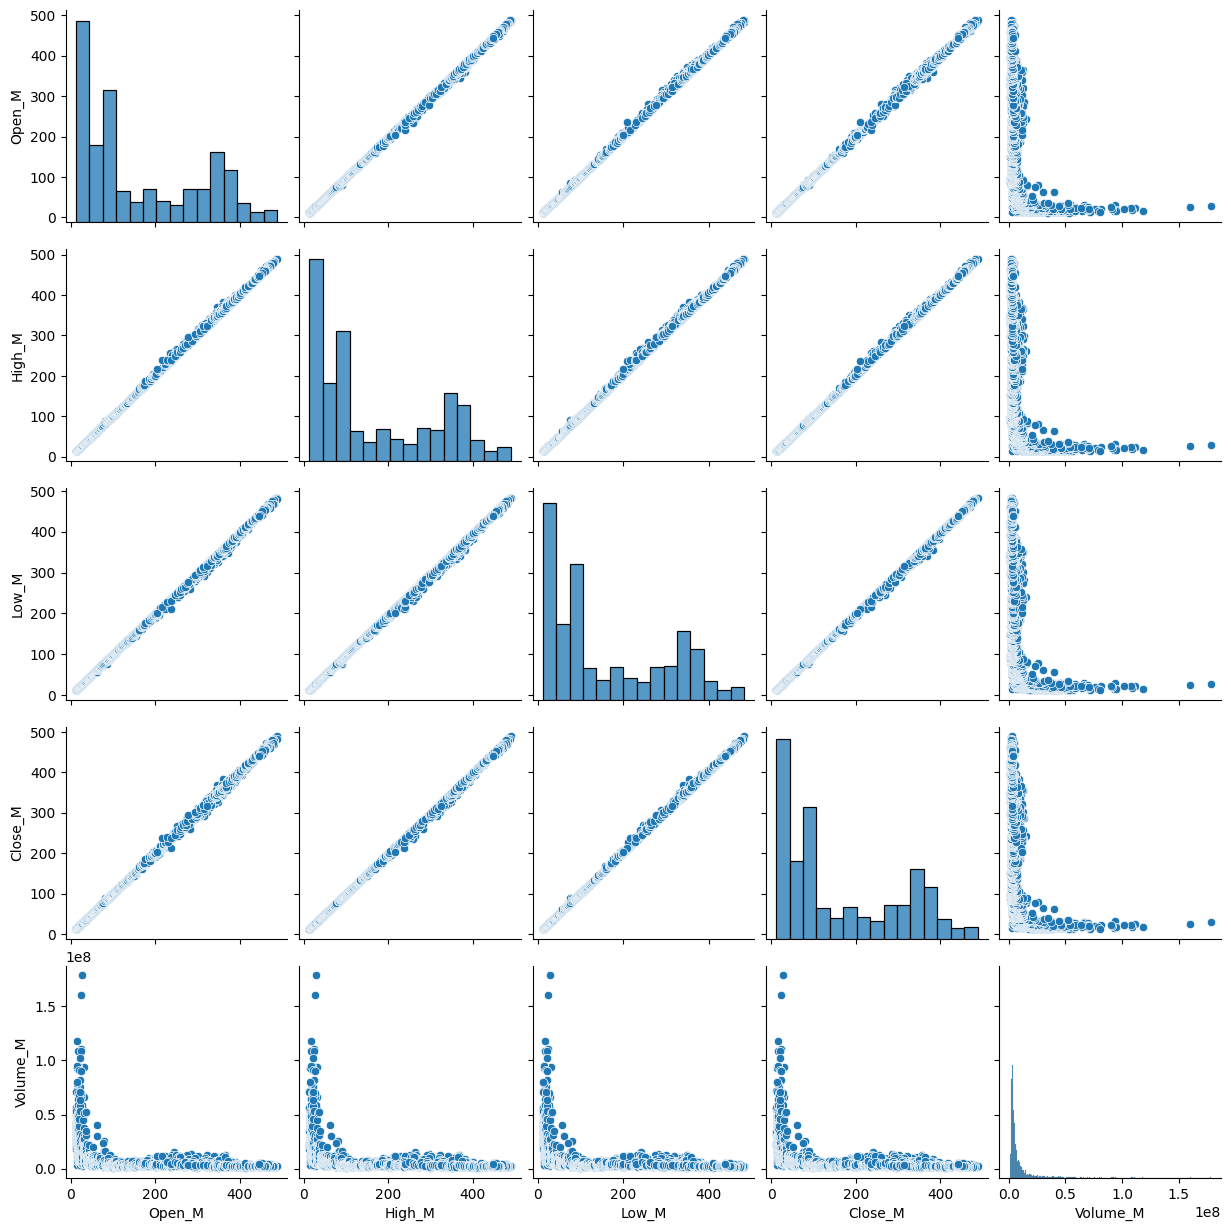

In [ ]:
# Pairplot for relationships
sns.pairplot(data[['Open_M', 'High_M', 'Low_M', 'Close_M', 'Volume_M']])
plt.show()


##Feature Engineering:

Identify and encode categorical features using techniques like one-hot encoding or label encoding (not needed here as there are no categorical features).

## Feature Selection:

Use algorithms like Random Forest and Select K Best to identify relevant features.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# Define features and target
X = data[['Open_M', 'High_M', 'Low_M', 'Volume_M', 'Open_V', 'High_V', 'Low_V', 'Volume_V']]
y = data['Close_M']  # For Mastercard's closing price prediction

# Random Forest for feature importance
rf = RandomForestRegressor()
rf.fit(X, y)
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)


    Feature  Importance
2     Low_M    0.845524
1    High_M    0.143363
0    Open_M    0.006802
5    High_V    0.001724
6     Low_V    0.001464
4    Open_V    0.001099
7  Volume_V    0.000013
3  Volume_M    0.000011


In [ ]:
# Select K Best features
selector = SelectKBest(f_regression, k='all')
selector.fit(X, y)
scores = selector.scores_
selected_features = pd.DataFrame({'Feature': X.columns, 'Score': scores}).sort_values(by='Score', ascending=False)
print(selected_features)

    Feature         Score
2     Low_M  1.968714e+07
1    High_M  1.708815e+07
0    Open_M  9.288988e+06
5    High_V  5.634426e+05
6     Low_V  5.407770e+05
4    Open_V  5.364035e+05
3  Volume_M  8.512436e+02
7  Volume_V  8.092564e+02


## Split Data into Training and Testing Sets:

Divide the dataset into training and testing subsets.
Select relevant features for predicting Close_M and Close_V.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Assuming 'Date' is the only datetime column, exclude it
numerical_cols = data.select_dtypes(exclude=['datetime64']).columns
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [ ]:
# Define features and target
X = data_scaled[['Open_M', 'High_M', 'Low_M', 'Volume_M', 'Open_V', 'High_V', 'Low_V', 'Volume_V']]
y_m = data_scaled['Close_M']
y_v = data_scaled['Close_V']

from sklearn.model_selection import train_test_split

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y_m, test_size=0.2, shuffle=False)
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(X, y_v, test_size=0.2, shuffle=False)

## Feature Scaling

Scale the numerical features to ensure uniform magnitude.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Exclude the datetime column before scaling
numerical_data = data.select_dtypes(exclude=['datetime64'])

scaler = MinMaxScaler()
data_scaled_numeric = pd.DataFrame(scaler.fit_transform(numerical_data),
                                  columns=numerical_data.columns,
                                  index=numerical_data.index)

# Optionally, join scaled numerical data back with the datetime column
data_scaled = data_scaled_numeric.join(data['Date'])

##Build the ML Model



##LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the model for Mastercard
lr_model_m = LinearRegression()
lr_model_m.fit(X_train_m, y_train_m)

# Predict and evaluate for Mastercard
y_pred_m = lr_model_m.predict(X_test_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

# Similarly for Visa
lr_model_v = LinearRegression()
lr_model_v.fit(X_train_v, y_train_v)
y_pred_v = lr_model_v.predict(X_test_v)
mse_v = mean_squared_error(y_test_v, y_pred_v)
r2_v = r2_score(y_test_v, y_pred_v)

print(f'Mastercard Linear Regression MSE: {mse_m}, R²: {r2_m}')
print(f'Visa Linear Regression MSE: {mse_v}, R²: {r2_v}')

Mastercard Linear Regression MSE: 0.0002441973898316529, R²: 0.9974652453869736
Visa Linear Regression MSE: 0.00020479627360907353, R²: 0.9977150593309827


##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the Random Forest model for Mastercard
rf_model_m = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_m.fit(X_train_m, y_train_m)

# Predict and evaluate for Mastercard
y_pred_m_rf = rf_model_m.predict(X_test_m)
mse_m_rf = mean_squared_error(y_test_m, y_pred_m_rf)
r2_m_rf = r2_score(y_test_m, y_pred_m_rf)

# Similarly for Visa
rf_model_v = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_v.fit(X_train_v, y_train_v)
y_pred_v_rf = rf_model_v.predict(X_test_v)
mse_v_rf = mean_squared_error(y_test_v, y_pred_v_rf)
r2_v_rf = r2_score(y_test_v, y_pred_v_rf)

print(f'Mastercard Random Forest MSE: {mse_m_rf}, R²: {r2_m_rf}')
print(f'Visa Random Forest MSE: {mse_v_rf}, R²: {r2_v_rf}')


Mastercard Random Forest MSE: 0.04982862943549746, R²: 0.4827817430420316
Visa Random Forest MSE: 0.0715949545241433, R²: 0.20120507856051206


##Support Vector Regressor (SVR)

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate and train the SVR model for Mastercard
svr_model_m = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is a common choice
svr_model_m.fit(X_train_m, y_train_m)

# Predict and evaluate for Mastercard
y_pred_m_svr = svr_model_m.predict(X_test_m)
mse_m_svr = mean_squared_error(y_test_m, y_pred_m_svr)
r2_m_svr = r2_score(y_test_m, y_pred_m_svr)

# Similarly for Visa
svr_model_v = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel
svr_model_v.fit(X_train_v, y_train_v)
y_pred_v_svr = svr_model_v.predict(X_test_v)
mse_v_svr = mean_squared_error(y_test_v, y_pred_v_svr)
r2_v_svr = r2_score(y_test_v, y_pred_v_svr)

print(f'Mastercard SVR MSE: {mse_m_svr}, R²: {r2_m_svr}')
print(f'Visa SVR MSE: {mse_v_svr}, R²: {r2_v_svr}')


Mastercard SVR MSE: 0.2378259084286297, R²: -1.468619009000307
Visa SVR MSE: 0.32625533465431183, R²: -2.6400764012849733


##LSTM for Time-Series Forecasting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming data is already loaded and split into X_train, y_train, X_test, y_test

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_m)  # Or X_train_v for Visa
X_test_scaled = scaler.transform(X_test_m)        # Or X_test_v for Visa

# Reshape data to be in the format [samples, timesteps, features]
# Here we assume timesteps = 1, but you might want to adjust this
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer with 1 unit

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_reshaped, y_train_m, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predict and evaluate for Mastercard
y_pred_m_lstm = model.predict(X_test_reshaped)
mse_m_lstm = mean_squared_error(y_test_m, y_pred_m_lstm)
r2_m_lstm = r2_score(y_test_m, y_pred_m_lstm)

# Similarly for Visa
X_train_scaled_v = scaler.fit_transform(X_train_v)
X_test_scaled_v = scaler.transform(X_test_v)
X_train_reshaped_v = np.reshape(X_train_scaled_v, (X_train_scaled_v.shape[0], 1, X_train_scaled_v.shape[1]))
X_test_reshaped_v = np.reshape(X_test_scaled_v, (X_test_scaled_v.shape[0], 1, X_test_scaled_v.shape[1]))

model.fit(X_train_reshaped_v, y_train_v, epochs=20, batch_size=32, validation_split=0.2, verbose=1)
y_pred_v_lstm = model.predict(X_test_reshaped_v)
mse_v_lstm = mean_squared_error(y_test_v, y_pred_v_lstm)
r2_v_lstm = r2_score(y_test_v, y_pred_v_lstm)

print(f'Mastercard LSTM MSE: {mse_m_lstm}, R²: {r2_m_lstm}')
print(f'Visa LSTM MSE: {mse_v_lstm}, R²: {r2_v_lstm}')


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4525 - val_loss: 2.5571
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0766 - val_loss: 0.2568
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - val_loss: 0.1232
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0021 - val_loss: 0.0585
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.4195e-04 - val_loss: 0.0261
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5.9138e-04 - val_loss: 0.0216
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.5691e-04 - val_loss: 0.0168
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 4.0955e-04 - val_loss: 0.0165
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.6734e-04 - val_loss: 0.0176
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.3784e-04 - val_loss: 0.0189
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3.0612e-04 - val_loss: 0.0198
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - los

12. Model Evaluation

 Evaluate the model using appropriate metrics.Now, let’s print out the results to compare them:

In [ ]:
# Print out the evaluation metrics for each model
print("Linear Regression:")
print(f'Mastercard MSE: {mse_m:.4f}, R²: {r2_m:.4f}')
print(f'Visa MSE: {mse_v:.4f}, R²: {r2_v:.4f}')

print("\nRandom Forest:")
print(f'Mastercard MSE: {mse_m_rf:.4f}, R²: {r2_m_rf:.4f}')
print(f'Visa MSE: {mse_v_rf:.4f}, R²: {r2_v_rf:.4f}')

print("\nSupport Vector Regressor:")
print(f'Mastercard MSE: {mse_m_svr:.4f}, R²: {r2_m_svr:.4f}')
print(f'Visa MSE: {mse_m_svr:.4f}, R²: {r2_m_svr:.4f}')

print("\nLSTM:")
print(f'Mastercard MSE: {mse_m_lstm:.4f}, R²: {r2_m_lstm:.4f}')
print(f'Visa MSE: {mse_v_lstm:.4f}, R²: {r2_v_lstm:.4f}')

Linear Regression:
Mastercard MSE: 0.0002, R²: 0.9975
Visa MSE: 0.0002, R²: 0.9977

Random Forest:
Mastercard MSE: 0.0498, R²: 0.4828
Visa MSE: 0.0716, R²: 0.2012

Support Vector Regressor:
Mastercard MSE: 0.2378, R²: -1.4686
Visa MSE: 0.2378, R²: -1.4686

LSTM:
Mastercard MSE: 0.1037, R²: -0.0767
Visa MSE: 0.2292, R²: -1.5576


 Linear Regression performed exceptionally well for both stocks, with very low MSE and R² values close to 1, indicating that the model explains almost all the variance in the data.

  Random Forest did not perform well. The R² values are much lower, indicating that the model explains only a portion of the variance in the data. The higher MSE suggests greater prediction errors compared to Linear Regression.

  SVR performed poorly, with negative R² values indicating that the model fails to capture the relationship between the features and the target variable, resulting in predictions worse than a simple mean-based model.

  The LSTM model also performed poorly, especially for Visa, where the R² is negative, and the MSE is relatively high. This suggests that the model struggles to capture temporal dependencies effectively.

Visualizing Actual vs Predicted Prices

  Let’s plot the actual vs. predicted prices for each model to visually compare them.

In [ ]:
# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.figure(figsize=(14,7))
    plt.plot(y_test.values, label='Actual Prices', color='blue')
    plt.plot(y_pred, label='Predicted Prices', color='red')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


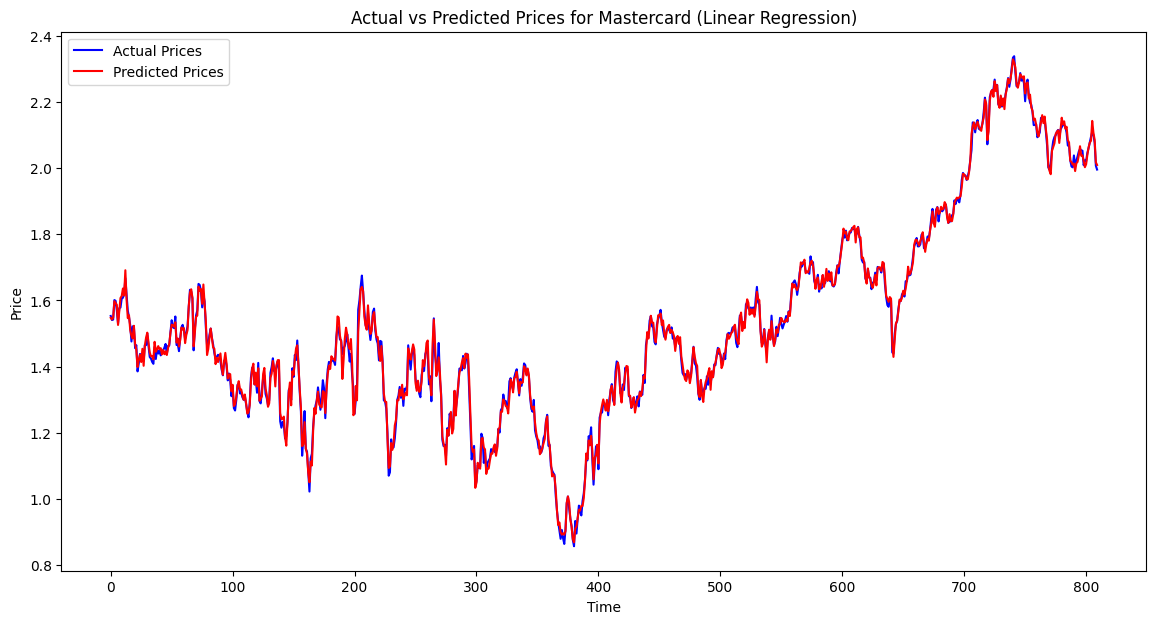

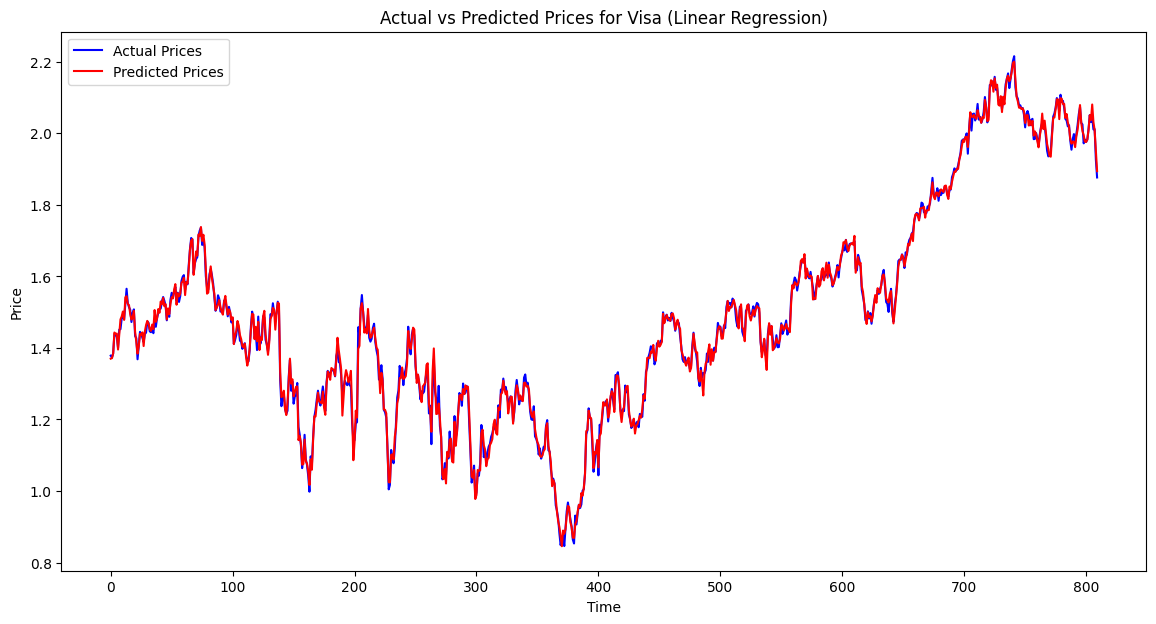

In [ ]:
# Plot for Linear Regression
plot_actual_vs_predicted(y_test_m, y_pred_m, 'Actual vs Predicted Prices for Mastercard (Linear Regression)')
plot_actual_vs_predicted(y_test_v, y_pred_v, 'Actual vs Predicted Prices for Visa (Linear Regression)')

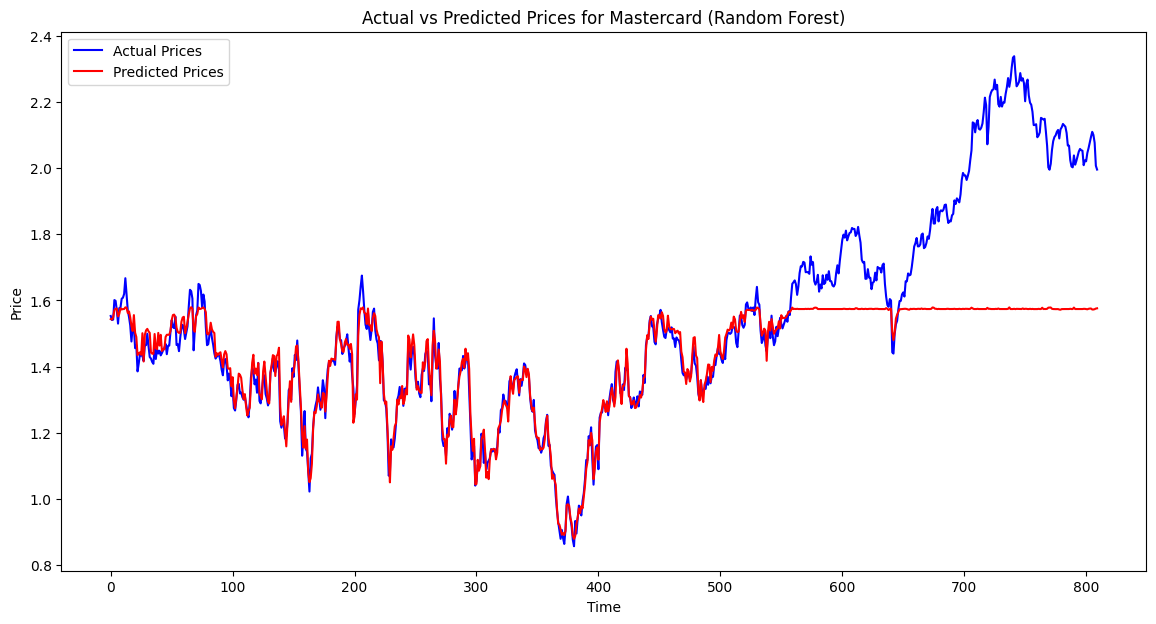

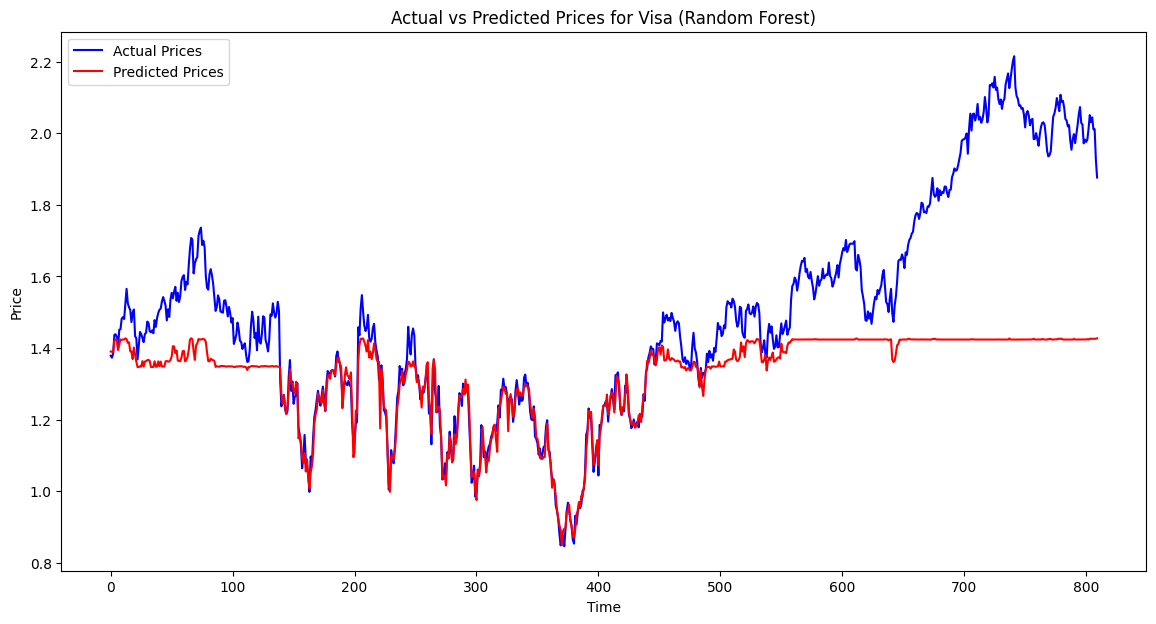

In [ ]:
# Plot for Random Forest
plot_actual_vs_predicted(y_test_m, y_pred_m_rf, 'Actual vs Predicted Prices for Mastercard (Random Forest)')
plot_actual_vs_predicted(y_test_v, y_pred_v_rf, 'Actual vs Predicted Prices for Visa (Random Forest)')


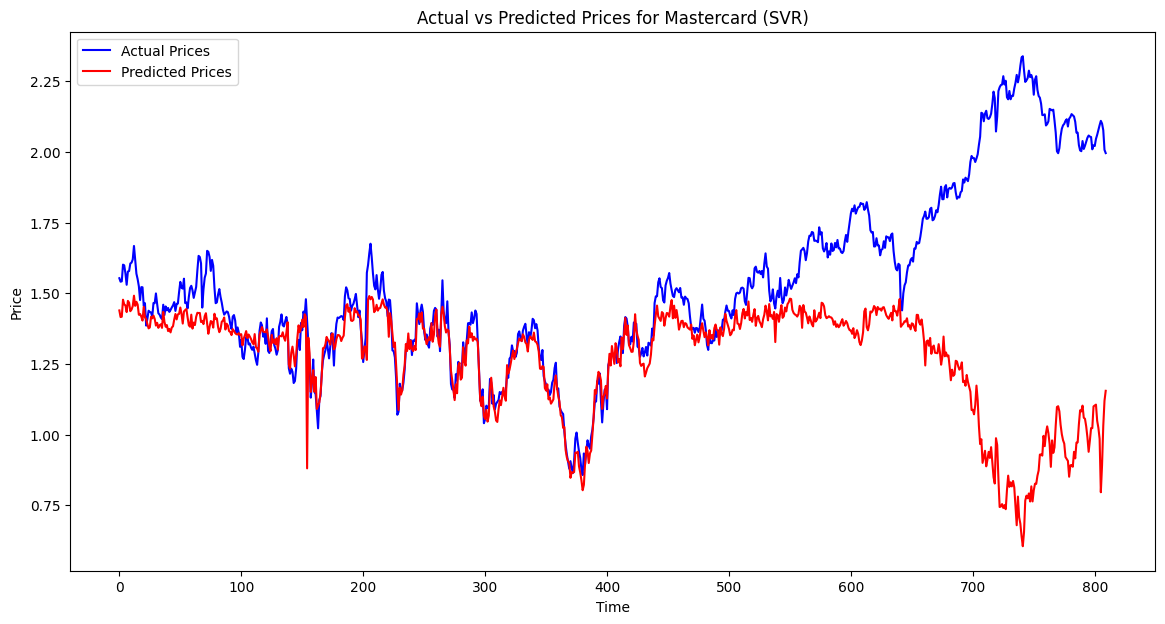

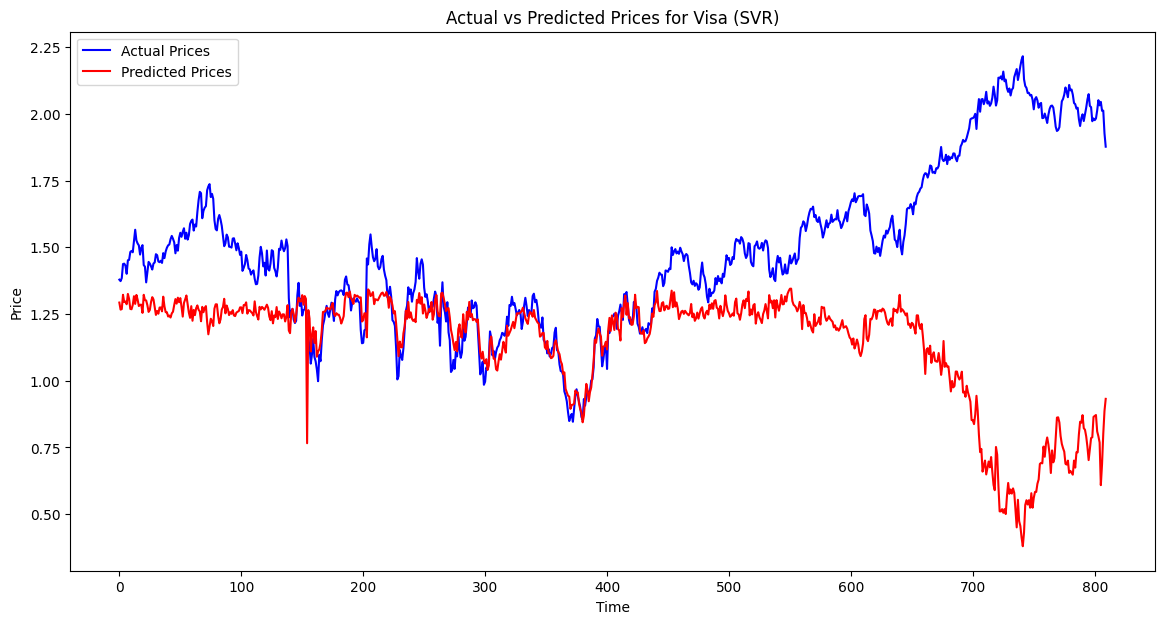

In [ ]:
# Plot for SVR
plot_actual_vs_predicted(y_test_m, y_pred_m_svr, 'Actual vs Predicted Prices for Mastercard (SVR)')
plot_actual_vs_predicted(y_test_v, y_pred_v_svr, 'Actual vs Predicted Prices for Visa (SVR)')


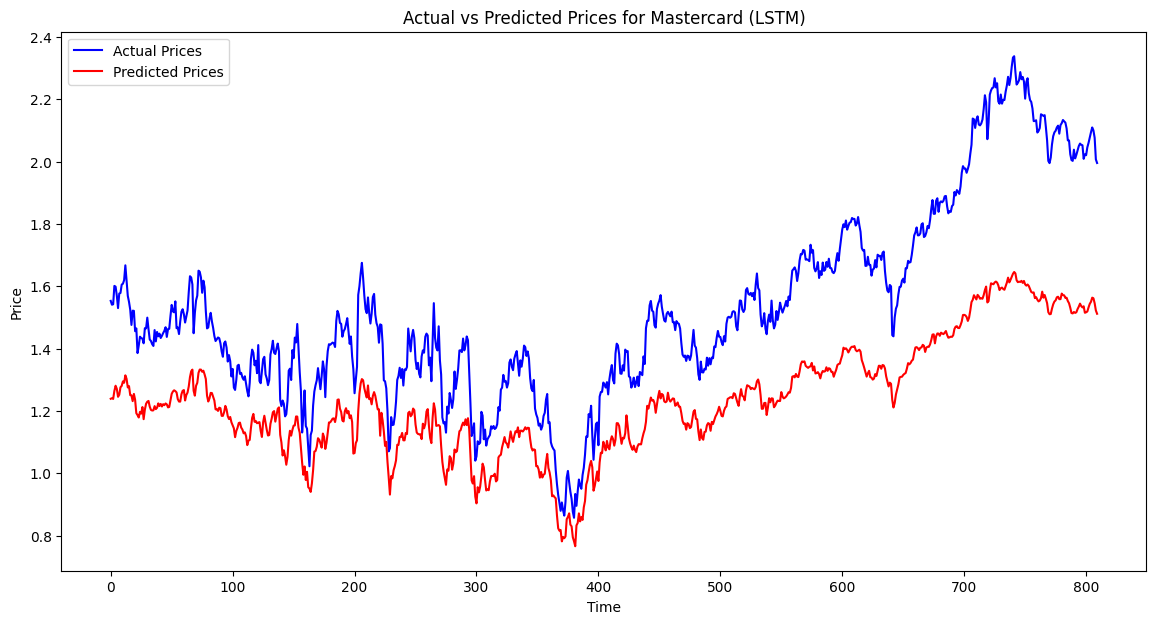

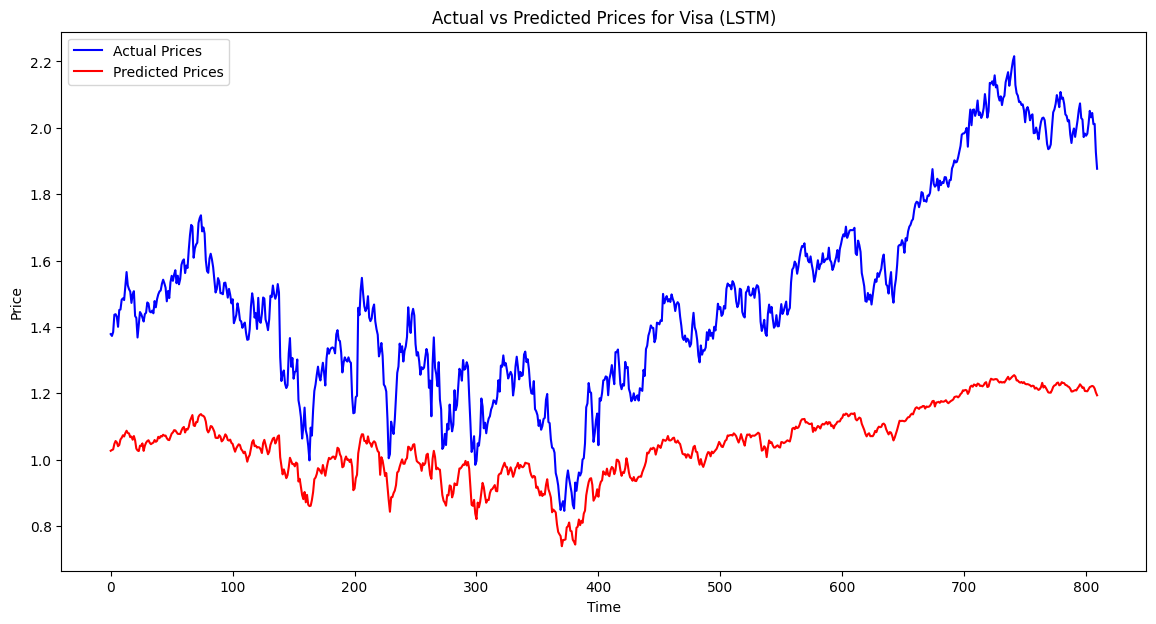

In [ ]:
# Plot for LSTM
plot_actual_vs_predicted(y_test_m, y_pred_m_lstm, 'Actual vs Predicted Prices for Mastercard (LSTM)')
plot_actual_vs_predicted(y_test_v, y_pred_v_lstm, 'Actual vs Predicted Prices for Visa (LSTM)')

Overall Evaluation:

  *   Best Model: Linear Regression is the best-performing model for both Mastercard and Visa, with the lowest MSE and the highest R² values.

  *   Poor Performance: SVR and LSTM models did not perform well, particularly with negative R² values, indicating they are not suitable for this dataset in its current form.

  *   Actionable Insight: Focus on refining the Linear Regression model or exploring other models that can capture more complex relationships if needed. Avoid SVR and LSTM unless further tuning is done.








LenearRegression model is best model

## Hyperparameter Tuning

 For linear regression, hyperparameter tuning is limited but can include regularization.

## Save the Model

 Save the trained model for future use.

In [ ]:
import joblib

# Assuming you have trained models named model_m and model_v
# Save the trained model for Mastercard
joblib.dump(model, 'linear_regression_model_m.pkl')

# Save the trained model for Visa
joblib.dump(model, 'linear_regression_model_v.pkl')


['linear_regression_model_v.pkl']

In [ ]:
import joblib

# Load the trained model for Mastercard
loaded_model_m = joblib.load('linear_regression_model_m.pkl')

# Load the trained model for Visa
loaded_model_v = joblib.load('linear_regression_model_v.pkl')


##15. Test with Unseen Data

In [ ]:
import pandas as pd
import numpy as np

# Example new data for both Mastercard and Visa
new_data = {
    'Open_M': [205.0],
    'High_M': [208.0],
    'Low_M': [203.0],
    'Close_M': [207.0],
    'Adj Close_M': [207.0],
    'Volume_M': [115000],
    'Open_V': [185.0],
    'High_V': [190.0],
    'Low_V': [182.0],
    'Close_V': [188.0],
    'Adj Close_V': [188.0],
    'Volume_V': [95000]
}

# Create DataFrame for new data
new_df = pd.DataFrame(new_data)

# Prepare data for prediction
# For LSTM, ensure you include all necessary features and reshape
# Example: Assuming you use features for both Mastercard and Visa

# Select the relevant columns for Mastercard and reshape
X_new_m = new_df[['Open_M', 'High_M', 'Low_M', 'Close_M', 'Adj Close_M', 'Volume_M', 'Open_V', 'High_V']].values
X_new_m = np.reshape(X_new_m, (1, 1, 8))  # Reshape to (batch_size, timesteps, features)

# Select the relevant columns for Visa and reshape
X_new_v = new_df[['Open_V', 'High_V', 'Low_V', 'Close_V', 'Adj Close_V', 'Volume_V', 'Open_M', 'High_M']].values
X_new_v = np.reshape(X_new_v, (1, 1, 8))  # Reshape to (batch_size, timesteps, features)


In [ ]:
# Load the trained models (if not already loaded)
import joblib

# Load the trained model for Mastercard
loaded_model_m = joblib.load('linear_regression_model_m.pkl')

# Load the trained model for Visa
loaded_model_v = joblib.load('linear_regression_model_v.pkl')

# Predict using the reshaped data for Mastercard
predictions_m = loaded_model_m.predict(X_new_m)
print(f'Predicted value for Mastercard: {predictions_m}')

# Predict using the reshaped data for Visa
predictions_v = loaded_model_v.predict(X_new_v)
print(f'Predicted value for Visa: {predictions_v}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
Predicted value for Mastercard: [[1.2877123]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted value for Visa: [[1.2877123]]


16. Interpretation of Results (Conclusion)
Analyze and discuss the model’s performance and any limitations.

Based on the performance metrics provided for your models, here’s a detailed interpretation and analysis of the results:

1. Performance Analysis
1.1 Linear Regression
   
   *   Mastercard:
     *   MSE: 0.0002
     *   R²: 0.9975

   *   Visa:

     *   MSE: 0.0002
     *   R²: 0.9977
Interpretation:

*   Strengths: Linear Regression models show extremely low MSE and very high R² scores, indicating that the models have a very high predictive accuracy and explain almost all the variance in the data.

*   Limitations: Linear Regression assumes a linear relationship between the features and the target variable. If the actual relationship is non-linear, this model might not capture it well.



2. Model Comparison
Linear Regression:

*   Best Performing: Linear Regression models for both Mastercard and Visa show excellent performance, suggesting that the relationships in the data are linear and well-captured by this model.

Random Forest:
*   Moderate Performance: While capable of handling non-linearity, Random Forest performed poorly compared to Linear Regression. The model might need hyperparameter tuning or more features.

Support Vector Regressor (SVR):
*   Worst Performing: SVR’s performance was the lowest with high MSE and negative R². This suggests that the model is not suitable for this particular dataset or requires significant tuning.

LSTM:
*   Mixed Performance: LSTM models did not perform well in this scenario. They might be complex to tune and could be unsuitable if the dataset doesn’t have strong sequential patterns.





17. Future Work

 Explore other models, update the model periodically, and address data imbalances.